In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('./data/sample.csv')

In [3]:
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [4]:
# Overview over null values

null_df = pd.DataFrame({'Null_Values': df.isna().sum(), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)}).reset_index()
null_df

,index,Null_Values,Percentage
0,action_taken_name,0,0.00
1,agency_name,0,0.00
2,applicant_ethnicity_name,0,0.00
3,applicant_race_name_1,0,0.00
4,applicant_sex_name,0,0.00
5,applicant_income_000s,24518,13.94
6,co_applicant_ethnicity_name,0,0.00
7,co_applicant_race_name_1,0,0.00
8,co_applicant_sex_name,0,0.00
9,county_name,485,0.28


In [5]:
df['applicant_sex_name'].groupby(df.applicant_sex_name).count()

applicant_sex_name
Female                                                                               48030
Information not provided by applicant in mail, Internet, or telephone application    10726
Male                                                                                 96939
Not applicable                                                                       20167
Name: applicant_sex_name, dtype: int64

In [6]:
# Filling null values 

df.county_name = df.county_name.fillna('No information')
df.msamd_name = df.msamd_name.fillna('No information')
df.denial_reason_name_1 = df.denial_reason_name_1.fillna(0)
df.denial_reason_name_2 = df.denial_reason_name_2.fillna(0)
df.denial_reason_name_3 = df.denial_reason_name_3.fillna(0)
df.applicant_income_000s = df.applicant_income_000s.fillna(df.applicant_income_000s.mean()).astype(int)
df.hud_median_family_income = df.hud_median_family_income.fillna(df.hud_median_family_income.mean()).astype(int)
df.minority_population = df.minority_population.fillna(df.minority_population.mean())
df.number_of_1_to_4_family_units = df.number_of_1_to_4_family_units.fillna(df.number_of_1_to_4_family_units.mean()).astype(int)
df.number_of_owner_occupied_units = df.number_of_owner_occupied_units.fillna(df.number_of_owner_occupied_units.mean()).astype(int)
df.population = df.population.fillna(df.population.mean()).astype(int)

In [7]:
# Converting columns from str to int without typing them as category

# I combine the 2 status' 'Loan originated' and 'Application approved but not accepted'. 
# My understanding is that the application was approved by the lender but not accepted by the applicant.
df.action_taken_name = df.action_taken_name.map({'Application denied by financial institution': 0, 'Preapproval request denied by financial institution': 0, 'File closed for incompleteness': 1, 'Application withdrawn by applicant': 2, 'Loan purchased by the institution': 3, 'Application approved but not accepted': 4, 'Loan originated': 4})

# Converting columns manually for the same order of information with applicant and co-applicant, labelling them astype('category)

df.applicant_ethnicity_name = df.applicant_ethnicity_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Not Hispanic or Latino': 1, 'Hispanic or Latino': 2, 'Not applicable': 3})
df.applicant_race_name_1 = df.applicant_race_name_1.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'White': 1, 'Asian': 2, 'Black or African American': 3, 'American Indian or Alaska Native': 4, 'Native Hawaiian or Other Pacific Islander': 5, 'Not applicable': 6})
df.applicant_sex_name = df.applicant_sex_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Female': 1, 'Male': 2, 'Not applicable': 3})
df.co_applicant_ethnicity_name = df.co_applicant_ethnicity_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Not Hispanic or Latino': 1, 'Hispanic or Latino': 2, 'Not applicable': 3, 'No co-applicant': 4})
df.co_applicant_race_name_1 = df.co_applicant_race_name_1.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'White': 1, 'Asian': 2, 'Black or African American': 3, 'American Indian or Alaska Native': 4, 'Native Hawaiian or Other Pacific Islander': 5, 'Not applicable': 6, 'No co-applicant': 7})
df.co_applicant_sex_name = df.co_applicant_sex_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Female': 1, 'Male': 2, 'Not applicable': 3, 'No co-applicant': 4})
df.denial_reason_name_1 = df.denial_reason_name_1.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9})
df.denial_reason_name_2 = df.denial_reason_name_2.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9})
df.denial_reason_name_3 = df.denial_reason_name_3.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9})


In [8]:
# Converting several columns from str to int, labelling some of them astype('category)

column_list = [1, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21]

for i in column_list:
    df.iloc[:,i] = pd.Categorical(df.iloc[:,i], ordered=True).codes
    # df.iloc[:,i] = df.iloc[:,i].astype('category')

In [9]:
df.dtypes

action_taken_name                   int64
agency_name                          int8
applicant_ethnicity_name            int64
applicant_race_name_1               int64
applicant_sex_name                  int64
applicant_income_000s               int32
co_applicant_ethnicity_name         int64
co_applicant_race_name_1            int64
co_applicant_sex_name               int64
county_name                          int8
denial_reason_name_1                int64
denial_reason_name_2                int64
denial_reason_name_3                int64
hoepa_status_name                    int8
lien_status_name                     int8
loan_purpose_name                    int8
loan_type_name                       int8
msamd_name                           int8
owner_occupancy_name                 int8
preapproval_name                     int8
property_type_name                   int8
purchaser_type_name                  int8
hud_median_family_income            int32
loan_amount_000s                  

<AxesSubplot:>

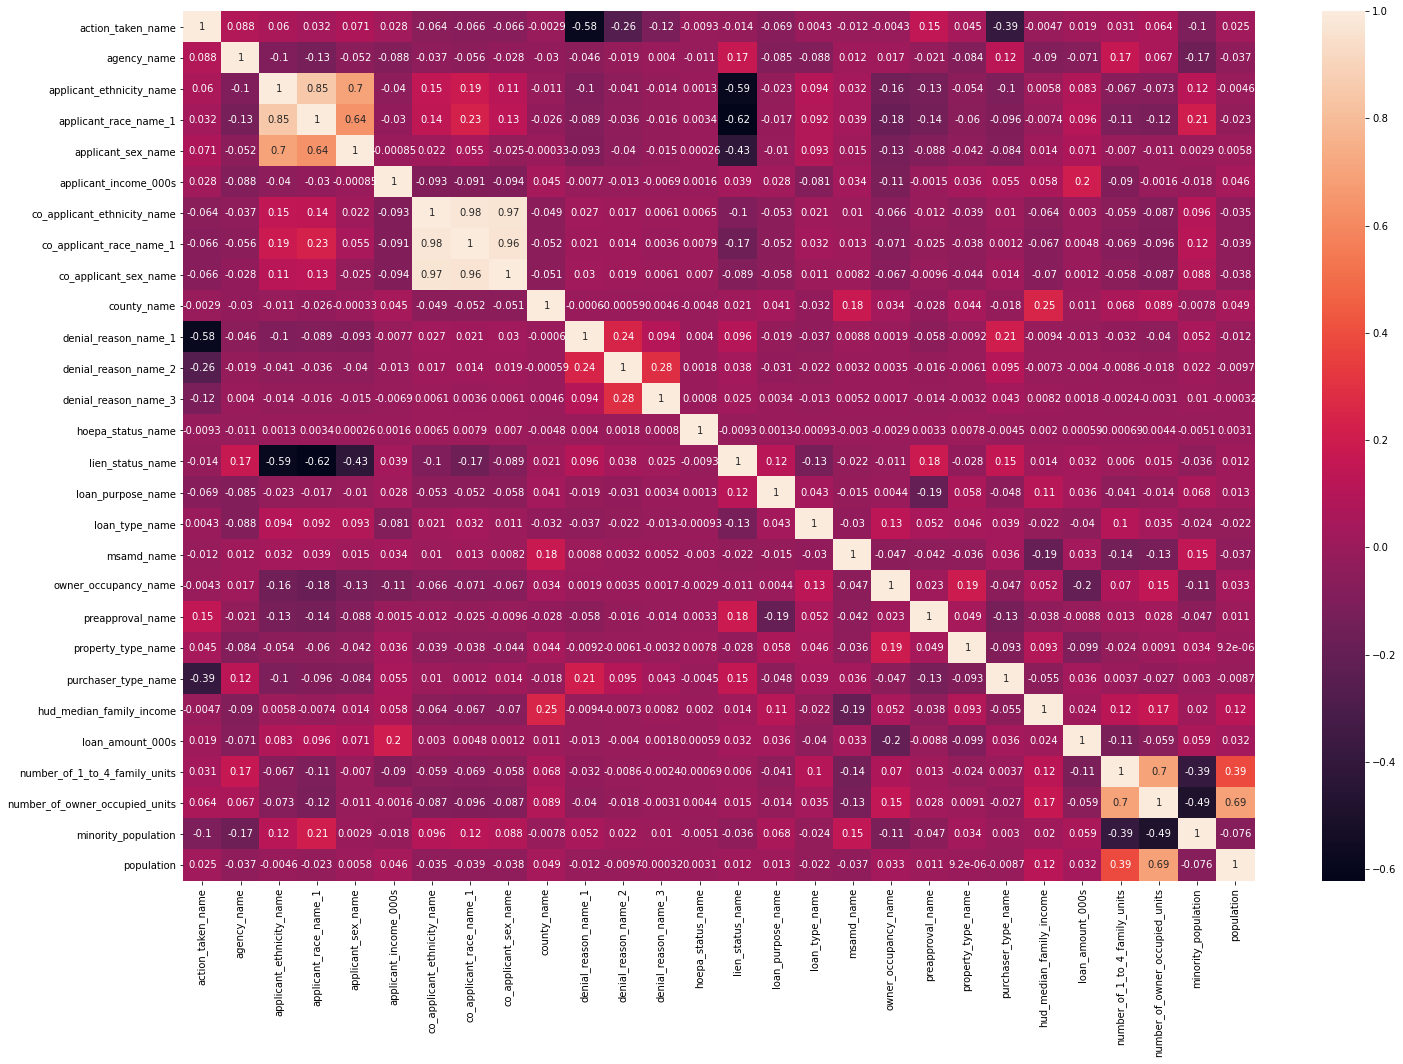

In [10]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [11]:
df.var()

action_taken_name                 2.403572e+00
agency_name                       2.723266e+00
applicant_ethnicity_name          5.795075e-01
applicant_race_name_1             2.909737e+00
applicant_sex_name                5.531195e-01
applicant_income_000s             6.419958e+04
co_applicant_ethnicity_name       2.143205e+00
co_applicant_race_name_1          8.174348e+00
co_applicant_sex_name             1.895169e+00
county_name                       2.541271e+02
denial_reason_name_1              1.814050e+00
denial_reason_name_2              4.989755e-01
denial_reason_name_3              1.107187e-01
hoepa_status_name                 1.535068e-04
lien_status_name                  5.560367e-01
loan_purpose_name                 4.161178e-01
loan_type_name                    4.669386e-01
msamd_name                        1.121180e+01
owner_occupancy_name              1.346662e-01
preapproval_name                  2.045529e-01
property_type_name                7.736994e-02
purchaser_typ

In [12]:
# Correlation depending on loan_approved

df.corr()['applicant_sex_name'].abs().sort_values(ascending = False)

applicant_sex_name                1.000000
applicant_ethnicity_name          0.696265
applicant_race_name_1             0.635023
lien_status_name                  0.425418
owner_occupancy_name              0.129171
denial_reason_name_1              0.093500
loan_type_name                    0.093239
preapproval_name                  0.087979
purchaser_type_name               0.084068
loan_amount_000s                  0.071116
action_taken_name                 0.070726
co_applicant_race_name_1          0.055472
agency_name                       0.052330
property_type_name                0.042198
denial_reason_name_2              0.039770
co_applicant_sex_name             0.025182
co_applicant_ethnicity_name       0.021845
denial_reason_name_3              0.014977
msamd_name                        0.014634
hud_median_family_income          0.014080
number_of_owner_occupied_units    0.011019
loan_purpose_name                 0.010036
number_of_1_to_4_family_units     0.006979
population 

In [13]:
X = df.drop(['applicant_sex_name'], axis = 1)
y = df['applicant_sex_name']
y = np.array(y)

In [14]:
# How many denied or approved loans does the dataset contain?

# print('0 - Application denied by financial institution\n', '1 - File closed for incompleteness\n', '2 - Application withdrawn by applicant\n', '3 - Loan purchased by the institution\n', '4 - Application approved but not accepted\n', '4 - Loan originated\n')
print('Distribution: \n' + str(pd.Series(y).value_counts()))
print('In Percent: \n' + str(pd.Series(y).value_counts() / pd.Series(y).count() * 100))

Distribution: 
2    96939
1    48030
3    20167
0    10726
dtype: int64
In Percent: 
2    55.122198
1    27.311187
3    11.467514
0     6.099100
dtype: float64


In [15]:
# The dataset is obviously very imbalanced. 
# A prediction with a high accuracy and Kappa is therefor only possible with a lot of try and error in feature optimization. 
# A possible solution: Oversampling!

In [16]:
# Oversampling: Balances the imbalanced dataset out by creating more samples with "canceled data" for better prediction results. 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [17]:
# Scaling 

X_scaled = StandardScaler().fit_transform(X_resampled)

# Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size = 0.25, random_state = 3)

In [18]:
# # After Oversampling

print('Distribution after Oversampling: \n' + str(pd.Series(y_resampled).value_counts()))

Distribution after Oversampling: 
3    96939
2    96939
1    96939
0    96939
dtype: int64


In [19]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of Logistic Regression is : 0.8401572122675084
Confusion Matrix : 
[[23234   526   308     3]
 [  749 20633  2804    10]
 [ 1000 10074 13165     9]
 [    2     4     6 24412]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24071
           1       0.66      0.85      0.74     24196
           2       0.81      0.54      0.65     24248
           3       1.00      1.00      1.00     24424

    accuracy                           0.84     96939
   macro avg       0.85      0.84      0.84     96939
weighted avg       0.85      0.84      0.84     96939



In [20]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.7868902479799434

In [21]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

In [ ]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.6394652135773942

In [ ]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.7314743210662785
Confusion Matrix : 
[[ 2081   246   374     1]
 [  205  6528  5313     2]
 [  332  5324 18506     5]
 [    1     1     2  5045]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2702
           1       0.54      0.54      0.54     12048
           2       0.76      0.77      0.77     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.73     43966
   macro avg       0.77      0.77      0.77     43966
weighted avg       0.73      0.73      0.73     43966



In [ ]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.5563304781853131

Maximum:  0.8174061433447098
Mean:  0.775562713552841


<AxesSubplot:>

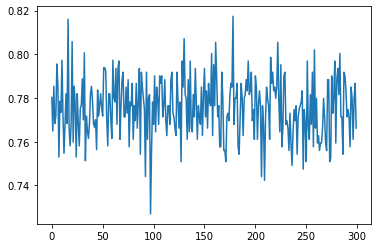

In [ ]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=300)
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [ ]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of KNN is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of KNN is : 0.699449574671337
Confusion Matrix : 
[[ 1861   207   634     0]
 [  244  4381  7420     3]
 [  522  4167 19470     8]
 [    0     2     7  5040]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2702
           1       0.50      0.36      0.42     12048
           2       0.71      0.81      0.75     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.70     43966
   macro avg       0.73      0.71      0.72     43966
weighted avg       0.68      0.70      0.69     43966



In [ ]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.4856710194050442

In [ ]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.6406313969885821
Confusion Matrix : 
[[ 2585    67    50     0]
 [ 1709  6975  3362     2]
 [ 2869  7733 13561     4]
 [    0     1     3  5045]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.36      0.96      0.52      2702
           1       0.47      0.58      0.52     12048
           2       0.80      0.56      0.66     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.64     43966
   macro avg       0.66      0.77      0.68     43966
weighted avg       0.71      0.64      0.65     43966



In [ ]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.4655913776051198

In [ ]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Gradient Boosting Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Gradient Boosting Classifier is : 0.7821270982122549
Confusion Matrix : 
[[ 2600    23    79     0]
 [  315  5208  6524     1]
 [  499  2130 21532     6]
 [    0     0     2  5047]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2702
           1       0.71      0.43      0.54     12048
           2       0.77      0.89      0.82     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.78     43966
   macro avg       0.81      0.82      0.80     43966
weighted avg       0.78      0.78      0.77     43966



In [ ]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.6271668738169291

In [ ]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.7852886321248237
Confusion Matrix : 
[[ 2598    19    85     0]
 [  303  5438  6306     1]
 [  477  2243 21443     4]
 [    0     0     2  5047]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      2702
           1       0.71      0.45      0.55     12048
           2       0.77      0.89      0.82     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.79     43966
   macro avg       0.81      0.82      0.81     43966
weighted avg       0.78      0.79      0.77     43966



In [ ]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.6336464328939941

In [ ]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.7462524	total: 220ms	remaining: 21.8s
1:	learn: 0.6077188	total: 286ms	remaining: 14s
2:	learn: 0.5375964	total: 357ms	remaining: 11.5s
3:	learn: 0.5020134	total: 427ms	remaining: 10.2s
4:	learn: 0.4765526	total: 503ms	remaining: 9.56s
5:	learn: 0.4617604	total: 584ms	remaining: 9.16s
6:	learn: 0.4573302	total: 661ms	remaining: 8.79s
7:	learn: 0.4496932	total: 728ms	remaining: 8.38s
8:	learn: 0.4463978	total: 808ms	remaining: 8.17s
9:	learn: 0.4437257	total: 888ms	remaining: 7.99s
10:	learn: 0.4423678	total: 961ms	remaining: 7.77s
11:	learn: 0.4413731	total: 1.03s	remaining: 7.54s
12:	learn: 0.4403331	total: 1.12s	remaining: 7.47s
13:	learn: 0.4381311	total: 1.23s	remaining: 7.53s
14:	learn: 0.4373633	total: 1.31s	remaining: 7.45s
15:	learn: 0.4362096	total: 1.41s	remaining: 7.43s
16:	learn: 0.4353461	total: 1.52s	remaining: 7.45s
17:	learn: 0.4337848	total: 1.63s	remaining: 7.45s
18:	learn: 0.4334118	total: 1.78s	remaining: 7.59s
19:	learn: 0.43311

In [ ]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.6342425971690957

In [ ]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Extra Trees Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Extra Trees Classifier is : 0.7749169813037347
Confusion Matrix : 
[[ 2484    71   147     0]
 [  247  6081  5719     1]
 [  380  3322 20458     7]
 [    0     0     2  5047]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2702
           1       0.64      0.50      0.57     12048
           2       0.78      0.85      0.81     24167
           3       1.00      1.00      1.00      5049

    accuracy                           0.77     43966
   macro avg       0.80      0.82      0.81     43966
weighted avg       0.77      0.77      0.77     43966



In [ ]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.6212405620113624

In [ ]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of LGBM Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of LGBM Classifier is : 0.41088568439248513
Confusion Matrix : 
[[  750  1513   252   187]
 [  360  8338  2751   599]
 [  891 14374  7683  1219]
 [  283  2490   982  1294]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.33      0.28      0.30      2702
           1       0.31      0.69      0.43     12048
           2       0.66      0.32      0.43     24167
           3       0.39      0.26      0.31      5049

    accuracy                           0.41     43966
   macro avg       0.42      0.39      0.37     43966
weighted avg       0.51      0.41      0.41     43966



In [ ]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.1282783334170443

In [ ]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'K-Fold Decision Tree'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, 
              accuracy_etc, accuracy_lgbm, model_kfdt.mean()],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              model_kfdt.mean()]
})


models.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
10,K-Fold Decision Tree,0.775563,0.775563
3,Random Forest Classifier,0.786949,0.639465
7,Cat Boost,0.784856,0.634243
6,XgBoost,0.785289,0.633646
5,Gradient Boosting Classifier,0.782127,0.627167
8,Extra Trees Classifier,0.774917,0.621241
0,Logistic Regression,0.771028,0.602404
2,Decision Tree Classifier,0.731474,0.556330
1,KNN,0.699450,0.485671
4,Ada Boost Classifier,0.640631,0.465591
